# U.S. Medical Insurance Costs

In [97]:

from matplotlib import pyplot as plt
import csv
import statistics as stat
ages = []
sexes = []
bmis = []
num_children= []
smoker_statuses = []
regions = []
insurance_charges = []

Some possible ideas for analysis are the following:

Find out the average age of the patients in the dataset.
Analyze where a majority of the individuals are from.
Look at the different costs between smokers vs. non-smokers.
Figure out what the average age is for someone who has at least one child in this dataset.

This imports the data into usable variables:

In [98]:
with open("insurance.csv") as insurance_csv:
    insurance_dict = csv.DictReader(insurance_csv)
    for row in insurance_dict:
        ages.append(row["age"])
        sexes.append(row["sex"])
        bmis.append(row["bmi"])
        num_children.append(row["children"])
        smoker_statuses.append(row["smoker"])
        regions.append(row["region"])
        insurance_charges.append(row["charges"])
        
ages = ages[1:]
sexes = sexes[1:]
bmis = bmis[1:]
num_children = num_children[1:]
smoker_statuses = smoker_statuses[1:]
regions = regions[1:]
insurance_charges = insurance_charges[1:]
        

This defines the class and various methods used for the analysis:

In [105]:
class PatientsInfo:
    def __init__(self,ages,sexes,bmis,num_children,smoker_statuses,regions,insurance_charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.num_children = num_children
        self.smoker_statuses = smoker_statuses
        self.regions = regions
        self.insurance_charges = insurance_charges
    def average_age(self):
        total = 0
        for age in self.ages:
            total+= int(age)
        average = round(total/len(self.ages),2)
        return "The average age of patients is " + str(average) + " years old." 
    def majority_region(self):
        majority_region = ""
        majority_count = 0 
        for region in self.regions:
            region_count = self.regions.count(region)
            if region_count > majority_count:
                majority_count = region_count
                majority_region = region
        return "Majority of people are from " + majority_region + " with " + str(majority_count) + " people."
    def create_dictionary(self):
        self.patient_dictionary = {}
        self.patient_dictionary["ages"] = [int(age) for age in self.ages]
        self.patient_dictionary["sexes"] = self.sexes
        self.patient_dictionary["bmis"] = self.bmis
        self.patient_dictionary["num_children"] = self.num_children
        self.patient_dictionary["smoker_statuses"] = self.smoker_statuses
        self.patient_dictionary["regions"] = self.regions
        self.patient_dictionary["insurance_charges"] = self.insurance_charges
        return self.patient_dictionary
    def diff_cost_smoke(self):
        total_cost_nonsmoke= 0
        non_smoke_count = 0
        total_cost_smoke= 0
        smoke_count = 0
        for i in range(len(self.smoker_statuses)):
            if self.smoker_statuses[i] =="yes":
                total_cost_smoke+=float(self.insurance_charges[i])
                smoke_count+=1
                
            elif self.smoker_statuses[i] =="no":
                total_cost_nonsmoke+=float(self.insurance_charges[i])
                non_smoke_count+=1
        average_nonsmoke = total_cost_nonsmoke/non_smoke_count
        average_smoke = total_cost_smoke/smoke_count
        difference = average_smoke-average_nonsmoke
        return "Smokers pay an average of $" + str(difference) + " more."
    def average_charges(self):
        total_charges = 0
        for charge in self.insurance_charges:
            total_charges+=float(charge)
        average = total_charges/len(self.insurance_charges)
        return "Average Charge: " + str(average)
    def diff_cost_for_obese(self):
        bmis = [float(bmi) for bmi in self.bmis]
        obese_cost_list= []
        rest_cost_list = []
        for i in range(len(self.bmis)):
            if bmis[i]>=30:
                obese_cost_list.append(float(insurance_charges[i]))
            elif bmis[i]<30:
                rest_cost_list.append(float(insurance_charges[i]))
        obese_mean = stat.mean(obese_cost_list)
        rest_mean = stat.mean(rest_cost_list)
        diff = round(obese_mean-rest_mean,2)
        return "Obese people pay an average of $" +str(diff) +" more."
    def cost_dependent_on_num_children(self,desired_num_children):
        num_children = [int(child) for child in self.num_children]
        cost_list = []
        for i in range(len(num_children)):
            if num_children[i] == desired_num_children:
                cost_list.append(float(insurance_charges[i]))
        average_cost = stat.mean(cost_list)
        return "The average cost for a person with {} children is ${}.".format(desired_num_children,average_cost)
    def average_cost_for_agerange(self,start_age,end_age):
        age_cost_list = []
        age = [int(age) for age in self.ages]
        for i in range(len(age)):
            if age[i] >= start_age and age[i]<=end_age:
                age_cost_list.append(float(insurance_charges[i]))
        average_cost = stat.mean(age_cost_list)
        return "People between the ages of {} and {} pay an average of ${}.".format(start_age,end_age,average_cost)
        
    


This defines the instance of the class and utilizes the various methods:


In [109]:
patient_data_instance = PatientsInfo(ages,sexes,bmis,num_children,smoker_statuses,regions,insurance_charges)
majority_region = patient_data_instance.majority_region()
average_age = patient_data_instance.average_age()
patient_dict = patient_data_instance.create_dictionary()
smoker_difference = patient_data_instance.diff_cost_smoke()
average_cost = patient_data_instance.average_charges()
obese_cost = patient_data_instance.diff_cost_for_obese()
cost_1_child = patient_data_instance.cost_dependent_on_num_children(1)
cost_2_child = patient_data_instance.cost_dependent_on_num_children(2)
cost_18_30yo = patient_data_instance.average_cost_for_agerange(18,30)

This prints the analyses:

In [108]:
print(majority_region)
print(average_age)
print(smoker_difference)
print(average_cost)
print(obese_cost)
print(cost_1_child)
print(cost_2_child)
print(cost_18_30yo)

Majority of people are from southeast with 364 people.
The average age of patients is 39.22 years old.
Smokers pay an average of $23671.514111814133 more.
Average Charge: 13267.718823305162
Obese people pay an average of $4848.46 more.
The average cost for a person with 1 children is $12731.171831635802.
The average cost for a person with 2 children is $15073.563733958334.
People between the ages of 18 and 30 pay an average of $9380.650534670429.


The following code down to the bottom of the project, creates a list of every unique age in the dataset, sorted in ascending order. It then calculates the average cost at each different age creates a matching list that has the average insurance cost for individuals at every single age. Below that, these findings are shown in a graph where a positive correlation between  

In [123]:
def unique_age_list(patient_dict):
    unique_ages = []
    patient_dict["ages"] = [int(age) for age in patient_dict["ages"]]
    for age in patient_dict["ages"]:
        if age not in unique_ages:
            unique_ages.append(age)
    return unique_ages
unique_ages = sorted(unique_age_list(patient_dict))
print(unique_ages)

def avgcost_at_age(age,patient_dict):
    cost_at_age = []
    insurance_charges = [float(charge) for charge in patient_dict["insurance_charges"]]
    for i in range(len(patient_dict["insurance_charges"])):
        if patient_dict["ages"][i] ==age:
            cost_at_age.append(insurance_charges[i])
    avg_cost = stat.mean(cost_at_age)
    return avg_cost
cost_at_every_age =[]
for age in unique_ages:
    avgcost = avgcost_at_age(age, patient_dict)
    cost_at_every_age.append(avgcost)


[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[7086.217556362319, 9641.38672761194, 10159.697736206897, 4730.464329642857, 10012.932801785715, 12419.820039642856, 10648.015962142857, 9838.365310714285, 6133.825308571429, 12184.701721428572, 9069.187564285714, 10430.158727037036, 12719.110358148147, 10196.980573333334, 9220.300290769232, 12351.532987307692, 11613.528120769231, 11307.1820312, 12204.476138, 18019.9118772, 8102.733674, 11778.2429452, 11772.25131, 9653.745649629629, 13061.038668888888, 19267.278653333335, 15859.396587037038, 14830.199856206897, 14342.59063862069, 17653.99959310345, 14632.500445172414, 12696.006264285714, 15663.003300689656, 15682.25586724138, 18256.269719310345, 16020.930755, 18758.546475357143, 16164.54548846154, 15025.515836538461, 16447.18525, 13878.9281116, 18895.8695316, 21979.418507391303, 22024.45760869565, 19

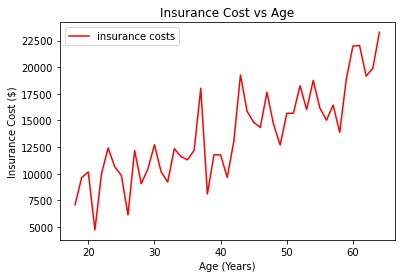

In [133]:

plt.plot(unique_ages,cost_at_every_age,color= "red",label = "insurance costs")
plt.title("Insurance Cost vs Age")
plt.xlabel("Age (Years)")
plt.ylabel("Insurance Cost ($)")
plt.legend()
plt.show()